s.kaviya , 24bad059
Accuracy : 0.6132971506105834
Precision: 1.0
Recall   : 0.030612244897959183
F1 Score : 0.0594059405940594


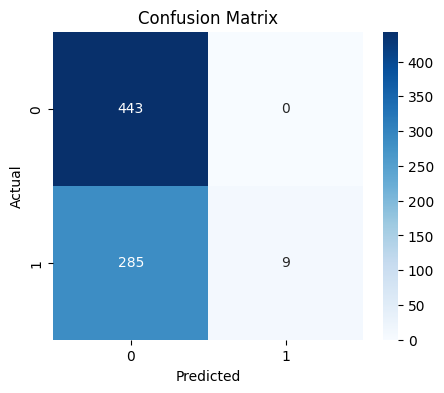

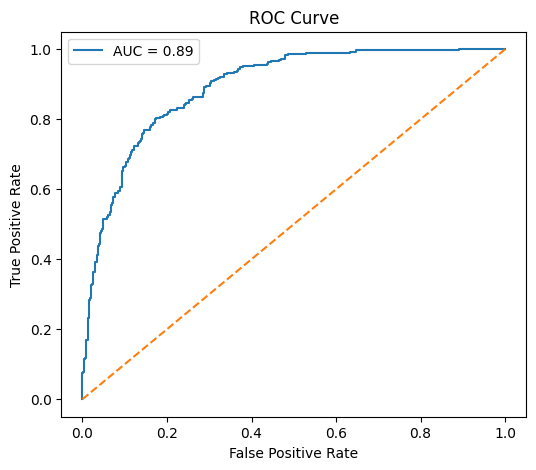

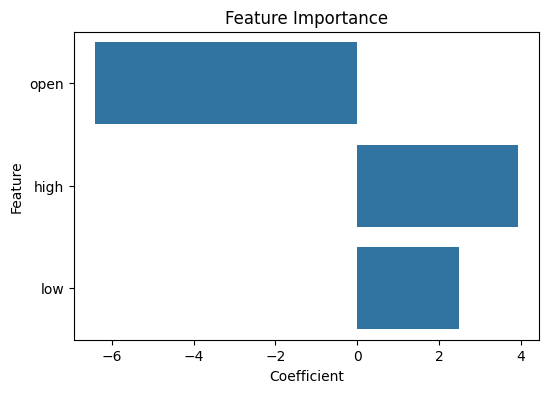

Best Parameters: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
Optimized F1 Score: 0.4696969696969697


In [2]:
print("s.kaviya , 24bad059")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    roc_curve,
    auc
)


df = pd.read_csv(
    r"LICI - 10 minute data.csv"
)


df['Price_Movement'] = np.where(df['close'] > df['open'], 1, 0)


features = ['open', 'high', 'low']
target = 'Price_Movement'

X = df[features]
y = df[target]


X = X.fillna(X.mean())
y = y.fillna(y.mode()[0])


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)


log_model = LogisticRegression()
log_model.fit(X_train, y_train)

y_pred = log_model.predict(X_test)
y_prob = log_model.predict_proba(X_test)[:, 1]


print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall   :", recall_score(y_test, y_pred))
print("F1 Score :", f1_score(y_test, y_pred))


cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


importance = pd.DataFrame({
    'Feature': features,
    'Coefficient': log_model.coef_[0]
})

plt.figure(figsize=(6, 4))
sns.barplot(x='Coefficient', y='Feature', data=importance)
plt.title("Feature Importance")
plt.show()


param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['liblinear']
}

grid = GridSearchCV(
    LogisticRegression(),
    param_grid,
    cv=5,
    scoring='f1'
)

grid.fit(X_train, y_train)

best_model = grid.best_estimator_
best_pred = best_model.predict(X_test)

print("Best Parameters:", grid.best_params_)
print("Optimized F1 Score:", f1_score(y_test, best_pred))
